<a href="https://colab.research.google.com/github/irfansaleem541/tech411_mba_wittenborg_netherlands/blob/main/ML_Methods_Python_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 2.1**: Loading dataset from Kaggle at Google Drive with Google Colab (Customer Churn)

In [1]:
import kagglehub
import pandas as pd
import os
"""
The os module in Python provides a way to interact with the operating system.
It allows you to work with file paths, directories, environment variables, and other OS-level operations
"""

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

# Assuming you downloaded the dataset to the specified path
# Modify this if necessary
data_files = os.listdir(path)
print("Files in dataset:", data_files)

# Load the CSV file into a pandas DataFrame
# Replace 'WA_Fn-UseC_-Telco-Customer-Churn.csv' with the correct file name from `data_files`
data_file = [file for file in data_files if file.endswith('.csv')][0]
data_path = os.path.join(path, data_file)

# Load the data
df = pd.read_csv(data_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Basic dataset information
print("\nDataset Information:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())


100%|██████████| 172k/172k [00:00<00:00, 516kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1
Files in dataset: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']
First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phon

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the target column for churn prediction
churn_column = 'PhoneService'  # Update this if the column name differs

# Convert the target column (Churn) from Yes/No to 0/1 using Label Encoding
label_encoder = LabelEncoder()
dataset = df.copy()  # Create a copy of the dataset to avoid modifying the original
dataset[churn_column] = label_encoder.fit_transform(dataset[churn_column])

# Separate input features (customer data) and the target (churn status)
input_features = dataset.drop(columns=[churn_column])  # All columns except 'Churn'
churn_status = dataset[churn_column]  # The 'Churn' column

# Handle categorical data by creating dummy variables (one-hot encoding)
input_features_encoded = pd.get_dummies(input_features, drop_first=True)

# Split the data into training (80%) and testing (20%) datasets
customer_data_train, customer_data_test, churn_train, churn_test = train_test_split(
    input_features_encoded, churn_status, test_size=0.2, random_state=42
)

# Train a Logistic Regression model on the training data
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(customer_data_train, churn_train)

# Predict churn status for the test data
predicted_churn = logistic_model.predict(customer_data_test)

# Evaluate the model's performance
print("Accuracy of the Model:", accuracy_score(churn_test, predicted_churn))
print("\nDetailed Classification Report:")
print(classification_report(churn_test, predicted_churn))


Accuracy of the Model: 1.0

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      1279

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



**Week 2.2**:
Clustering - K-mean example - Customer Segmentation

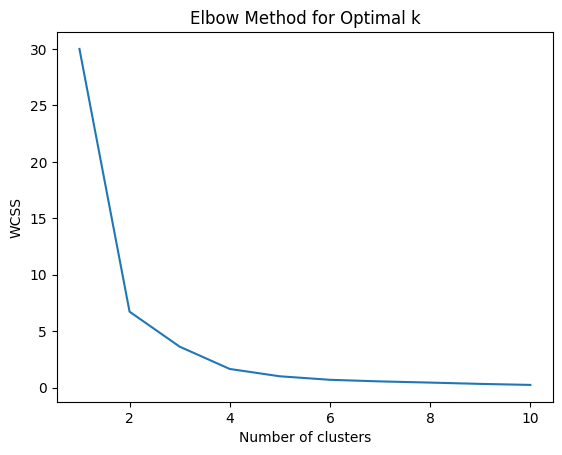

    Age  Monthly Spend  Cluster
0    22            250        1
1    25            300        1
2    47            500        0
3    52            600        2
4    46            450        0
5    56            700        2
6    24            200        1
7    31            350        1
8    54            550        2
9    29            280        1
10   35            400        1
11   33            390        1
12   42            490        0
13   48            510        0
14   60            650        2


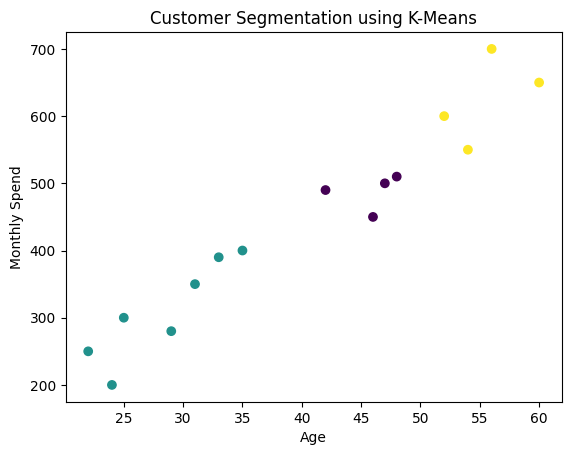

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample customer data (Age, Monthly Spend)
data = {
    'Age': [22, 25, 47, 52, 46, 56, 24, 31, 54, 29, 35, 33, 42, 48, 60],
    'Monthly Spend': [250, 300, 500, 600, 450, 700, 200, 350, 550, 280, 400, 390, 490, 510, 650]
}

# Create DataFrame
df = pd.DataFrame(data)

# Feature scaling: Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Using the Elbow method to find the optimal number of clusters (k)
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Checking for k=1 to k=10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph to find the optimal 'k'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, assume we choose k=3 for this example
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the original DataFrame
df['Cluster'] = y_kmeans

# Display the customer segmentation
print(df)

# Visualize the clusters
plt.scatter(df['Age'], df['Monthly Spend'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Age')
plt.ylabel('Monthly Spend')
plt.show()


**Week 2.3**:
***K-Mean second example ***

**Explanation:**
**Business Context:** The data now represents customer information, specifically annual income (in thousands of dollars) and a spending score, which is a commonly used metric for customer segmentation in business.

**Clustering:** The KMeans clustering algorithm groups customers into three segments based on their annual income and spending behavior. These segments can help a business target different types of customers with tailored marketing strategies.

**Visualization:** The plot shows the customers' distribution based on income and spending score, with the red 'X' markers representing the centroids of the three clusters.

**Expected Output:**
The centroids will represent the average annual income and spending score for each cluster. For example, one cluster might represent high-income, low-spending customers, while another might represent low-income, high-spending customers.

Let me know if you'd like to refine or adjust the example further for other types of business data!

Cluster Centroids:
 [[160.          14.2       ]
 [ 42.85714286  44.57142857]
 [105.          63.16666667]]

Cluster Labels: [1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 0 0 0]


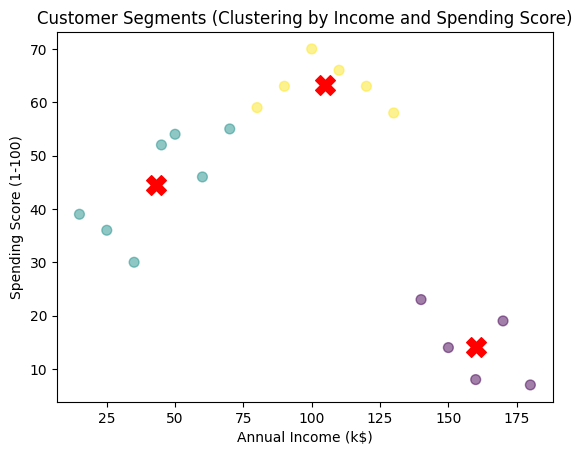

In [ ]:
import pandas as pd  # For reading datasets
import numpy as np  # For computations
import matplotlib.pyplot as plt  # For visualization
from pandas import DataFrame  # For creating data frame
from sklearn.cluster import KMeans

# Business-related data (Customer segmentation: annual income vs. spending score)
data = {
    'Annual Income (k$)': [15, 25, 35, 45, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180],
    'Spending Score (1-100)': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7]
}

# Create a DataFrame
df = DataFrame(data, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Create and fit the KMeans model (3 clusters)
kmeans = KMeans(n_clusters=3).fit(df)

# Find the centroids of the clusters
centroids = kmeans.cluster_centers_
print("Cluster Centroids:\n", centroids)

# Get the associated cluster for each customer
labels = kmeans.labels_
print("\nCluster Labels:", labels)

# Display the clusters and their centroids
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # Centroids marked with 'X'
plt.title("Customer Segments (Clustering by Income and Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


**Week 2.4**:
***Gaussian Mixture Model (GMM)***

**Key Changes:**
Instead of KMeans, the GaussianMixture model is used for clustering. It is a probabilistic model that assumes the data is generated from a mixture of several Gaussian distributions.
n_components=3 is set to specify that we expect 3 clusters.
Prediction and Centroids:

The gmm.predict(df) method assigns each data point to a cluster, similar to how kmeans.labels_ works.
The gmm.means_ returns the centroids (means of the Gaussian distributions), and gmm.covariances_ provides the covariance matrices, representing the spread of each cluster.
Plotting:

The scatter plot is generated similarly to the KMeans approach, but now the colors represent the GMM cluster assignments. The red 'X' markers represent the centroids.
Expected Output:
Cluster Means: The means of each cluster (centroids), which represent the average values of Annual Income and Spending Score for each cluster.
Cluster Covariances: These show the shape (spread) of the clusters.
Visualization: The customer data will be clustered into 3 segments, and the centroids will be marked with red 'X' markers.
The Gaussian Mixture model can handle overlapping clusters better than KMeans because of its probabilistic nature, making it useful in business applications where data is often not neatly separated into distinct clusters.

Cluster Means (Centroids):
 [[160.          14.2       ]
 [115.08725863  64.21656655]
 [ 52.37221532  48.28503606]]

Cluster Covariances:
 [[[200.00000104 -54.00000002]
  [-54.00000002  38.16000101]]

 [[124.56359268 -48.59002959]
  [-48.59002959  19.13008284]]

 [[567.5893454  214.74983646]
  [214.74983646 112.04945217]]]


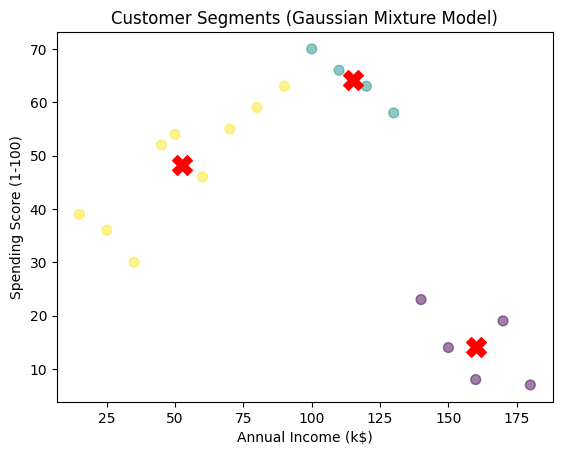

In [ ]:
import pandas as pd  # For reading datasets
import numpy as np  # For computations
import matplotlib.pyplot as plt  # For visualization
from pandas import DataFrame  # For creating data frame
from sklearn.mixture import GaussianMixture

# Business-related data (Customer segmentation: annual income vs. spending score)
data = {
    'Annual Income (k$)': [15, 25, 35, 45, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180],
    'Spending Score (1-100)': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7]
}

# Create a DataFrame
df = DataFrame(data, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Create and fit the Gaussian Mixture Model (GMM) with 3 components (clusters)
gmm = GaussianMixture(n_components=3).fit(df)

# Predict the cluster labels for each data point
labels = gmm.predict(df)

# Find the means (centroids) and covariances of the clusters
centroids = gmm.means_
covariances = gmm.covariances_

print("Cluster Means (Centroids):\n", centroids)
print("\nCluster Covariances:\n", covariances)

# Display the clusters and their centroids
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # Centroids marked with 'X'
plt.title("Customer Segments (Gaussian Mixture Model)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


**Week 2.5**:  
***Hierarchical Clustering***

Key Changes:

AgglomerativeClustering:

The AgglomerativeClustering class is used for hierarchical clustering.
n_clusters=3: Specifies that we want 3 clusters.
affinity='euclidean': Specifies the distance metric to use for clustering (Euclidean distance is commonly used).
linkage='ward': Specifies the linkage method to use. The 'ward' method minimizes the variance of the clusters.
Dendrogram:

We use scipy.cluster.hierarchy.linkage to compute the linkage matrix and then plot a dendrogram, which shows the hierarchical relationships between data points.
The dendrogram helps visualize the clustering process and decide where to "cut" the tree to form clusters.
Plotting the Clusters:

After performing hierarchical clustering, we visualize the clusters by coloring the points according to the cluster labels obtained from AgglomerativeClustering.
Explanation:
Dendrogram: The dendrogram is a tree-like diagram that shows how the data points are merged. The vertical axis represents the distance (or dissimilarity) between clusters, and the horizontal axis represents the data points. You can cut the dendrogram at a certain level (distance) to decide the number of clusters.

Clustering: The points in the scatter plot are colored based on the clusters assigned by the hierarchical clustering algorithm.

Expected Output:
Dendrogram: A tree-like plot that helps visualize the hierarchical clustering process. It shows how the data points are grouped and merged step by step.

Clustered Plot: A scatter plot where the customers are grouped into 3 clusters based on their annual income and spending score.

**Advantages of Hierarchical Clustering:**
No need to specify the number of clusters: You can cut the dendrogram at any level to decide the number of clusters, making it flexible.
Useful for smaller datasets: Hierarchical clustering works well when you want to see the hierarchical relationships between data points.

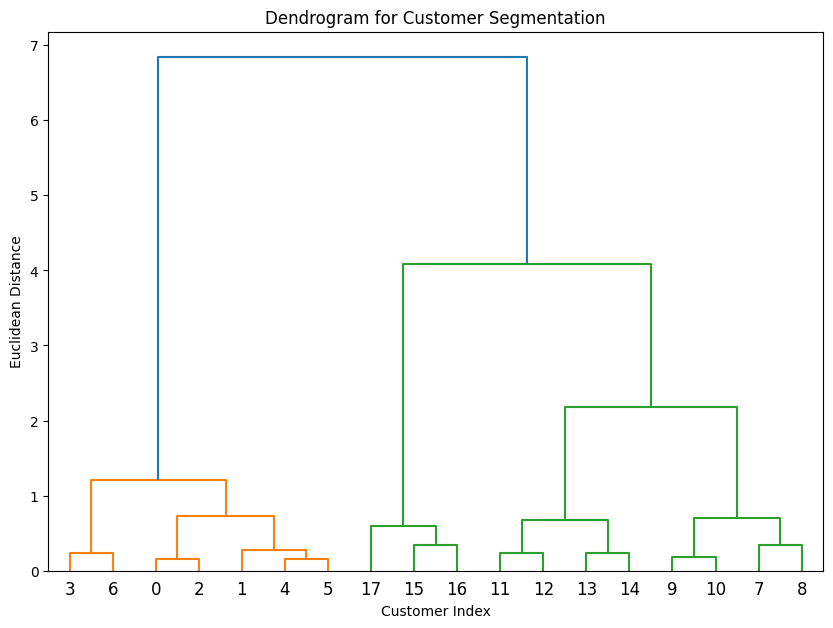

In [ ]:
import pandas as pd  # For reading datasets
import numpy as np  # For computations
import matplotlib.pyplot as plt  # For visualization
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram # Import linkage and dendrogram

# Example business-related data (Customer spending on Milk and Grocery)
data = {
    'Milk': [100, 200, 150, 400, 250, 300, 450, 500, 600, 700, 650, 800, 850, 900, 950, 1100, 1200, 1300],
    'Grocery': [200, 250, 180, 300, 270, 290, 350, 400, 450, 500, 530, 600, 650, 700, 750, 900, 950, 1000]
}

# Create DataFrame
df = pd.DataFrame(data, columns=['Milk', 'Grocery'])

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = cluster.fit_predict(data_scaled)
"""
# Display the cluster labels
print(labels)

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis')
plt.title("Customer Segmentation based on Milk and Grocery Spending")
plt.xlabel("Milk Spending (scaled)")
plt.ylabel("Grocery Spending (scaled)")
plt.show()
"""
# Dendrogram Visualization using linkage
linked = linkage(data_scaled, method='ward')

# Create the dendrogram plot
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Customer Segmentation')
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distance')
plt.show()


**Week 2.6 ****DBSCAN**

*High Value Customers:* These are customers who generate significant revenue for the business. They might be loyal customers who frequently purchase premium products or services.

*Price-Sensitive Customers:* These customers are highly focused on discounts or lower prices. They are willing to switch brands or providers if they find a better deal elsewhere.

*New Customers: *These are potential new customers who may have just joined the market or have only made a few initial purchases.

***Features***

Customer Engagement Score (CES) focuses on customer activity and interactions with the brand.

Purchase Recency (PR) focuses on the timing of the most recent purchase, which is a separate dimension from engagement.

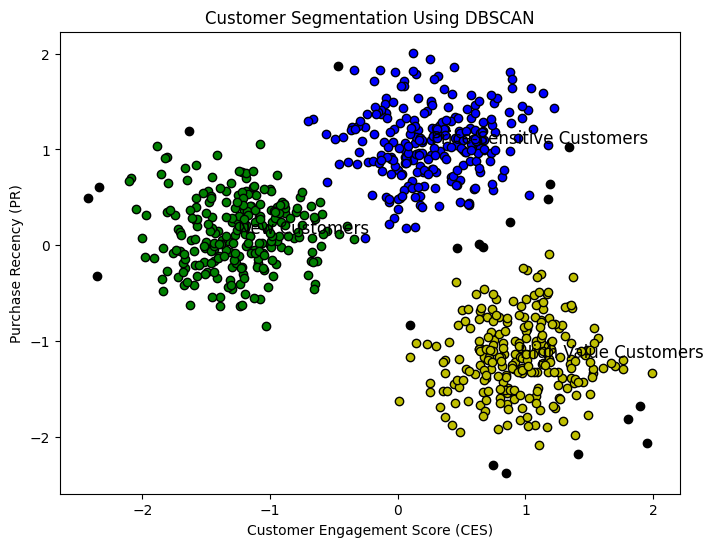

Outliers: [[-2.42671277  0.49675213]
 [-1.63416695  1.19057371]
 [-2.35322045 -0.31810002]
 [ 1.80601352 -1.81028459]
 [ 1.34044794  1.03030209]
 [ 0.74675015 -2.29213122]
 [ 1.40931563 -2.18369891]
 [ 1.1906035   0.64200922]
 [-0.46502671  1.87234623]
 [ 0.46302539 -0.03235177]
 [ 0.84761526 -2.37544839]
 [ 1.89380858 -1.67966435]
 [ 0.64008132  0.01370892]
 [ 0.67080977 -0.01939061]
 [ 0.88143542  0.2443139 ]
 [ 0.09241116 -0.83573174]
 [-2.34373125  0.60338357]
 [ 1.95131345 -2.06010914]
 [ 1.17755506  0.48672618]]


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example: Create synthetic customer data
X, _ = make_blobs(n_samples=750, centers=3, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

# Set up DBSCAN parameters
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

# Get the labels and identify core samples
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Map labels to business customer segment names
cluster_names = {
    0: "High Value Customers",
    1: "Price-Sensitive Customers",
    2: "New Customers"
}

# Identify outliers (label = -1)
outliers = X[labels == -1]

# Assign customer segments to each cluster
cluster_1 = X[labels == 0]
cluster_2 = X[labels == 1]
cluster_3 = X[labels == 2]

# Plot the results with specific colors for each cluster and outliers in black
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Black for outliers
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Add labels to each cluster
for k in range(n_clusters):
    cluster_center = np.mean(X[labels == k], axis=0)
    plt.text(cluster_center[0], cluster_center[1], cluster_names[k], fontsize=12, color='black')

# Add business-relevant feature names
plt.xlabel("Customer Engagement Score (CES)")  # Feature 1: Engagement
plt.ylabel("Purchase Recency (PR)")           # Feature 2: Recency of purchases
plt.title("Customer Segmentation Using DBSCAN")
plt.show()

# Print outliers
print("Outliers:", outliers)


**Week 2.7**:
**Regression:**

 Let's consider a scenario where we're analyzing the relationship between advertising spend and sales revenue. We'll use the Advertising Spend as the independent variable (X) and Sales Revenue as the dependent variable (y), similar to the original setup.

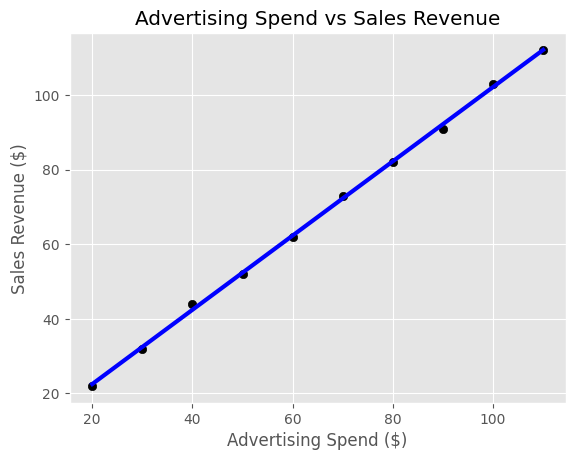

Linear regression model coefficients: [[0.99575758]]
Linear regression model intercept: [2.57575758]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
import numpy as np

# Simulating business dataset: Advertising Spend vs Sales Revenue
# Example business data (in thousands)
data = {
    'Advertising Spend ($)': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
    'Sales Revenue ($)': [22, 32, 44, 52, 62, 73, 82, 91, 103, 112]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define X (Advertising Spend) and y (Sales Revenue)
X = df['Advertising Spend ($)'].values.reshape(-1, 1)
y = df['Sales Revenue ($)'].values.reshape(-1, 1)

# Initialize Linear Regression model
regr = LinearRegression()

# Train the model
regr.fit(X, y)

# Plot the original data points (Advertising Spend vs Sales Revenue)
plt.scatter(X, y, color='black')
plt.xlabel('Advertising Spend ($)')
plt.ylabel('Sales Revenue ($)')

# Plot the linear regression line
plt.plot(X, regr.predict(X), color='blue', linewidth=3)

# Show the plot
plt.title('Advertising Spend vs Sales Revenue')
plt.show()

# Print the model's coefficients and intercept
print(f"Linear regression model coefficients: {regr.coef_}")
print(f"Linear regression model intercept: {regr.intercept_}")


**Week 2.8**
** *italicized text*Multiple Regression**

Let’s consider a business scenario where the company uses several predictor variables (e.g., Advertising Spend, Product Price, and Competitor Pricing) to predict Sales Revenue. We will perform multiple linear regression instead of logistic regression and use more than one feature for prediction.

Linear regression model coefficients: [0.63660053 0.83745214 0.36025061]
Linear regression model intercept: -5.936048265460059


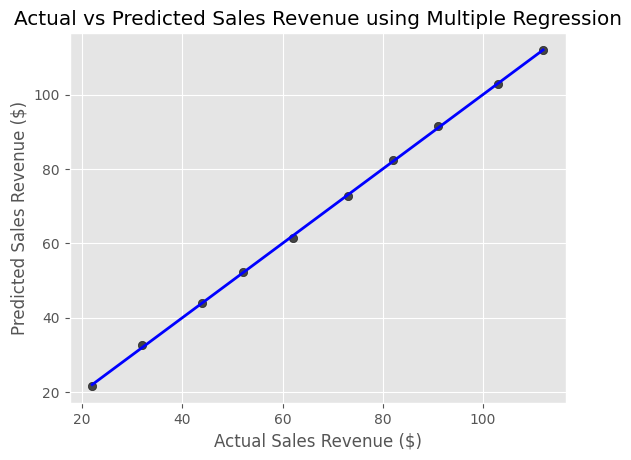

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Simulated business dataset for multiple regression: Advertising Spend, Product Price, Competitor Pricing vs Sales Revenue
data = {
    'Advertising Spend ($)': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
    'Product Price ($)': [10, 15, 20, 22, 25, 30, 33, 35, 40, 42],
    'Competitor Pricing ($)': [18, 19, 21, 22, 23, 25, 27, 30, 32, 35],
    'Sales Revenue ($)': [22, 32, 44, 52, 62, 73, 82, 91, 103, 112]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define X (predictor variables) and y (Sales Revenue)
X = df[['Advertising Spend ($)', 'Product Price ($)', 'Competitor Pricing ($)']]
y = df['Sales Revenue ($)']

# Initialize the Linear Regression model
lm_multi = LinearRegression()

# Fit the model
lm_multi.fit(X, y)

# Print the model's coefficients and intercept
print(f"Linear regression model coefficients: {lm_multi.coef_}")
print(f"Linear regression model intercept: {lm_multi.intercept_}")

# Predict sales revenue using the model
y_pred = lm_multi.predict(X)

# Plot the actual vs predicted Sales Revenue
plt.scatter(y, y_pred, color='black', alpha=0.7)
plt.xlabel('Actual Sales Revenue ($)')
plt.ylabel('Predicted Sales Revenue ($)')
plt.title('Actual vs Predicted Sales Revenue using Multiple Regression')
plt.plot([min(y), max(y)], [min(y), max(y)], color='blue', linewidth=2)  # Diagonal line for perfect prediction
plt.show()


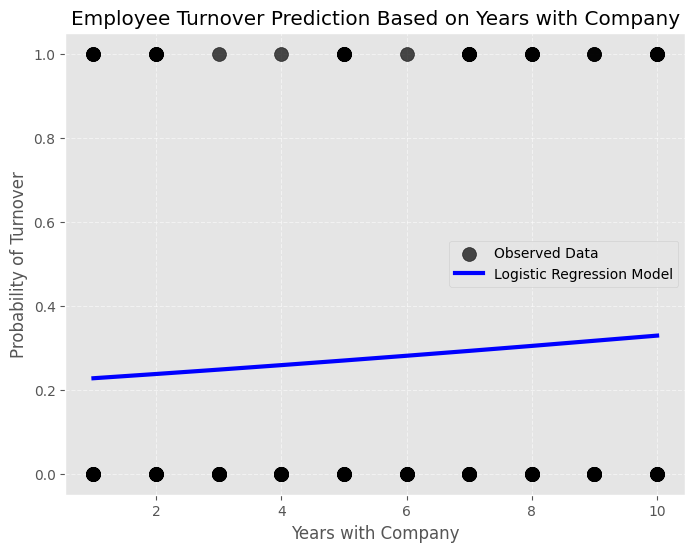

Model Coefficients: [[0.0566565]]
Model Intercept: [-1.28002948]
Model Accuracy: 0.72
Confusion Matrix: 
[[108   0]
 [ 42   0]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# Simulated data: Generate 150 samples with random years of company and turnover intention
np.random.seed(42)  # For reproducibility
years_with_company = np.random.randint(1, 11, size=150)  # Random years between 1 and 10
turnover_intention = np.random.binomial(1, p=0.3, size=150)  # Random turnover intention with p=0.3

# Create DataFrame
df = pd.DataFrame({
    'Years with Company': years_with_company,
    'Turnover Intention (1 = Yes, 0 = No)': turnover_intention
})

# Define the predictors (X) and target variable (y)
X = df[['Years with Company']].values  # Predictor (Years with the company)
y = df['Turnover Intention (1 = Yes, 0 = No)'].values  # Target variable (Turnover Intention)

# Initialize and train Logistic Regression model
lm_log = LogisticRegression()
lm_log.fit(X, y)

# Predict the probability of turnover (target variable)
y_prob = lm_log.predict_proba(X)[:, 1]  # Probability of turnover (class 1)

# Plot the data and logistic regression model
X_ordered = np.sort(X, axis=0)  # Order the predictor for smooth plot

plt.figure(figsize=(8, 6))
plt.scatter(X.ravel(), y, color='black', alpha=0.7, label="Observed Data", s=100, zorder=5)
plt.plot(X_ordered, lm_log.predict_proba(X_ordered)[:, 1], color='blue', linewidth=3, label="Logistic Regression Model")
plt.xlabel('Years with Company')
plt.ylabel('Probability of Turnover')
plt.title('Employee Turnover Prediction Based on Years with Company')

# Adding grid and legend for clarity
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Show the plot
plt.show()

# Print model details for HR students to interpret
print(f"Model Coefficients: {lm_log.coef_}")
print(f"Model Intercept: {lm_log.intercept_}")

# Evaluate the model's performance using accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = lm_log.predict(X)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")


**Week 3.1**:
**Sample Sentiment analysis for customer feedback**

Explanation:
Data Preparation: We have a simple dataset of customer Age and Monthly Spend.
Standardization: The data is scaled using StandardScaler to normalize the features and bring them to the same scale, which is important for distance-based algorithms like K-Means.
Elbow Method: The Elbow method is used to determine the optimal number of clusters (k). We try different values of k (from 1 to 10) and calculate the Within-Cluster Sum of Squares (WCSS). The "elbow" in the plot helps identify the best k.
K-Means Clustering: We perform K-Means clustering with the selected number of clusters (k=3 in this case) and assign cluster labels to each customer.
Customer Segmentation: The resulting DataFrame shows each customer's cluster label, indicating which segment they belong to.
Visualization: The scatter plot visualizes the customers, colored by their assigned cluster.




In [ ]:
from textblob import TextBlob

# Sample customer rating text
text = "The service was bad, and the staff was not helpful!"

# Perform sentiment analysis
blob = TextBlob(text)
polarity = blob.sentiment.polarity  # Range: -1 (negative) to 1 (positive)

# Interpret the sentiment polarity
if polarity > 0.5:
    sentiment = "Very Positive"
elif 0.1 < polarity <= 0.5:
    sentiment = "Positive"
elif -0.1 <= polarity <= 0.1:
    sentiment = "Neutral"
elif -0.5 <= polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Very Negative"

# Display user-friendly results
print("Customer Feedback:")
print(f"Text: {text}")
print(f"Sentiment Score: {polarity:.2f} ({sentiment})")


Customer Feedback:
Text: The service was bad, and the staff was not helpful!
Sentiment Score: -0.87 (Very Negative)


In [ ]:
# Install Git
!apt-get install git -y

# Clone the repository
!git clone https://<your-username>:<your-token>@github.com/irfansaleem541/tech411_mba_wittenborg_netherlands.git

# Change directory to the repository
%cd tech411_mba_wittenborg_netherlands

# Copy all files to the repository
!cp -r /content/* /content/tech411_mba_wittenborg_netherlands/

# Add all files to Git
!git add .

# Commit the changes
!git commit -m "Initial commit with all project files"

# Push changes to GitHub
!git push origin main
